In [2]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew

In [3]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/pump')
print(os.getcwd())


C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\pump


In [6]:
#Individual functions for targeted features
# file= ('0_dB_slider/slider/id_00/abnormal/00000000.wav')

def getfeature(file):
    
    wave , sr = librosa.load(file)
    
    chroma= librosa.feature.chroma_stft(y=wave, sr=sr)
    chroma_stft = (np.mean(chroma), np.amin(chroma), np.amax(chroma), np.std(chroma), 
                   np.median(chroma))
    
    mel = librosa.feature.melspectrogram(y=wave, sr=sr)
    mel_spec = (np.mean(mel), np.amin(mel), np.amax(mel), np.std(mel), 
                   np.median(mel))
    
    
    rmse = librosa.feature.rms(y=wave)
    rms_f = (np.mean(rmse), np.amin(rmse), np.amax(rmse), np.std(rmse), 
                   np.median(rmse))
    
    spec = librosa.feature.spectral_centroid(y=wave, sr=sr)
    spec_cent = (np.mean(spec), np.amin(spec), np.amax( spec), np.std(spec), 
                   np.median(spec))
    
    
    specb = librosa.feature.spectral_bandwidth(y=wave, sr=sr)
    spec_bw = (np.mean(specb), np.amin(specb), np.amax( specb), np.std(specb), 
                   np.median(specb))
    
    roll = librosa.feature.spectral_rolloff(y=wave, sr=sr)
    rolloff = (np.mean(roll), np.amin(roll), np.amax(roll), np.std(roll), 
                   np.median(roll))
    
    
    zcr = librosa.feature.zero_crossing_rate(wave)
    zcrf = (np.mean(zcr), np.amin(zcr), np.amax(zcr), np.std(zcr), 
                   np.median(zcr))
    
    mfcc_mean  = np.mean(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_min  = np.amin(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_max  = np.amax(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_std  = np.std(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_med = np.median(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    
    list_features = (chroma_stft, mel_spec, rms_f, spec_cent, spec_bw, rolloff, zcrf,  
                     mfcc_mean,  mfcc_min,  mfcc_max,  mfcc_std,  mfcc_med)
    
    feature_matrix=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((list_features))

    return feature_matrix
    

In [7]:
#load our entire dataset and compute the features of each audio file

def load_data():
    
    X,y=[],[]
    
    count = 0
    holder = ['normal', 'abnormal']
    for i in holder:
        v = f'*_dB_pump/pump/id_*/{i}/*.wav'
        if i == 'normal':
            target = 0
        else:
            target = 1
            
    
        for file in glob.glob(v):
            file_name=os.path.basename(file)
            features = getfeature(file)
            X.append(features)
            y.append(target)
            count += 1
            
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{4205} audio samples',end=' ')
        
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


In [8]:
features, target = load_data()

 Processed 12615/4205 audio samples 

In [9]:

print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) 
features_df


Audio samples represented: 12615
Numerical features extracted per sample: 235


,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,0.683818,0.108170,1.0,0.190720,0.679056,0.010531,7.151322e-17,0.466670,0.021297,0.004169,...,-0.124755,0.204830,-0.369489,-2.238656,4.716025,-4.255774,3.338483,-3.896483,5.041117,-1.407492
1,0.583996,0.129650,1.0,0.220414,0.546216,0.021984,1.201486e-16,1.294522,0.072030,0.001337,...,0.562411,-2.292946,1.141588,-2.991373,4.649738,-4.002141,3.838974,-4.009880,2.825847,1.075340
2,0.645543,0.094941,1.0,0.204511,0.633333,0.023768,1.320205e-16,2.386425,0.078395,0.001977,...,0.208499,-0.069810,2.970889,-2.798779,6.113424,-1.600979,4.438368,-1.818079,1.918840,-0.818630
3,0.334817,0.014604,1.0,0.279246,0.241708,0.021464,1.160403e-16,2.258773,0.092336,0.001330,...,-8.809001,-11.222979,-4.693631,-4.585680,6.185575,-0.899375,6.875870,-1.772375,3.351006,-3.978265
4,0.363110,0.027821,1.0,0.277294,0.258746,0.019026,1.150735e-16,1.738417,0.055788,0.001415,...,8.073055,1.522294,-4.421966,-11.739436,-1.185205,-5.009368,7.183607,-0.421902,2.827000,-1.914379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,0.520409,0.044676,1.0,0.253924,0.482333,0.003355,1.884953e-17,0.307427,0.010153,0.000038,...,2.902631,-1.102791,0.425305,-3.573908,1.377608,-9.326706,-6.191280,-11.942490,-6.865319,-6.605413
12611,0.521859,0.082061,1.0,0.242351,0.470752,0.003022,1.396323e-17,0.123734,0.007071,0.000066,...,4.538052,6.101332,5.055927,-3.092504,2.578304,-8.390204,-4.064268,-6.515065,2.032784,-5.071927
12612,0.499682,0.068543,1.0,0.260848,0.443785,0.003211,1.794031e-17,0.151006,0.007746,0.000069,...,3.497271,-1.248067,2.794472,-0.614687,4.316348,-3.785549,-1.836788,-5.867575,-4.305118,-3.327899
12613,0.483045,0.072764,1.0,0.254647,0.415853,0.003286,1.686015e-17,0.127506,0.008191,0.000074,...,2.629176,-1.018300,3.153202,-1.612237,3.861713,-5.186883,-2.197448,-5.732657,-3.224555,-2.162239


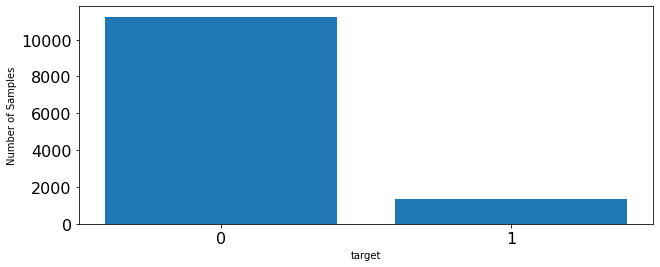

In [10]:
#Imbalances in the target dataset

# plot target
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

#np.unique returns ordered list of unique elements and count of each element
target_list, count = np.unique(target, return_counts=True)
plt.bar(x=range(2), height=count)
plt.xticks(ticks=range(2), labels = [target for target in target_list],fontsize=10)
plt.xlabel('target')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [11]:
# Adding target to features dataframe
features_df['target'] = target.tolist()

features_df

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.683818,0.108170,1.0,0.190720,0.679056,0.010531,7.151322e-17,0.466670,0.021297,0.004169,...,0.204830,-0.369489,-2.238656,4.716025,-4.255774,3.338483,-3.896483,5.041117,-1.407492,0
1,0.583996,0.129650,1.0,0.220414,0.546216,0.021984,1.201486e-16,1.294522,0.072030,0.001337,...,-2.292946,1.141588,-2.991373,4.649738,-4.002141,3.838974,-4.009880,2.825847,1.075340,0
2,0.645543,0.094941,1.0,0.204511,0.633333,0.023768,1.320205e-16,2.386425,0.078395,0.001977,...,-0.069810,2.970889,-2.798779,6.113424,-1.600979,4.438368,-1.818079,1.918840,-0.818630,0
3,0.334817,0.014604,1.0,0.279246,0.241708,0.021464,1.160403e-16,2.258773,0.092336,0.001330,...,-11.222979,-4.693631,-4.585680,6.185575,-0.899375,6.875870,-1.772375,3.351006,-3.978265,0
4,0.363110,0.027821,1.0,0.277294,0.258746,0.019026,1.150735e-16,1.738417,0.055788,0.001415,...,1.522294,-4.421966,-11.739436,-1.185205,-5.009368,7.183607,-0.421902,2.827000,-1.914379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,0.520409,0.044676,1.0,0.253924,0.482333,0.003355,1.884953e-17,0.307427,0.010153,0.000038,...,-1.102791,0.425305,-3.573908,1.377608,-9.326706,-6.191280,-11.942490,-6.865319,-6.605413,1
12611,0.521859,0.082061,1.0,0.242351,0.470752,0.003022,1.396323e-17,0.123734,0.007071,0.000066,...,6.101332,5.055927,-3.092504,2.578304,-8.390204,-4.064268,-6.515065,2.032784,-5.071927,1
12612,0.499682,0.068543,1.0,0.260848,0.443785,0.003211,1.794031e-17,0.151006,0.007746,0.000069,...,-1.248067,2.794472,-0.614687,4.316348,-3.785549,-1.836788,-5.867575,-4.305118,-3.327899,1
12613,0.483045,0.072764,1.0,0.254647,0.415853,0.003286,1.686015e-17,0.127506,0.008191,0.000074,...,-1.018300,3.153202,-1.612237,3.861713,-5.186883,-2.197448,-5.732657,-3.224555,-2.162239,1


In [12]:
#CSV dataFrame

def createCsv(df):
    

    df.to_csv('martin_pump40.csv', index=False)
    
createCsv(features_df)